# US Walmart Sales Exploratoty Data Analysis (EDA)

This notebook is trying to answer the business questions of an American multinational retail corporation, Walmart. The dataset can be found in the kaggle: https://www.kaggle.com/aditya6196/retail-analysis-with-walmart-data 

### The business questions:
1. Which store had the highest total sales?
2. Find out which holiday that had the highest sales.
3. Provide monthly view of the sales.
4. Total sales in each year.

If you would like to see the Tableau dashboard of these answers, check: https://public.tableau.com/profile/alifia.c.harmadi#!/

In [193]:
#Import Libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import decimal

In [124]:
#Import Dataset
path = "C:/Users/Alifia/Downloads/Walmart_Store_sales.csv"
df=pd.read_csv(path)
print("Rows: %d and Columns: %d \n" %df.shape )
print("Missing values info:\n",df.isnull().sum())
print("Data type info: \n", df.dtypes)
df.head()

Rows: 6435 and Columns: 8 

Missing values info:
 Store           0
Date            0
Weekly_Sales    0
Holiday_Flag    0
Temperature     0
Fuel_Price      0
CPI             0
Unemployment    0
dtype: int64
Data type info: 
 Store             int64
Date             object
Weekly_Sales    float64
Holiday_Flag      int64
Temperature     float64
Fuel_Price      float64
CPI             float64
Unemployment    float64
dtype: object


,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,05-02-2010,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,12-02-2010,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,19-02-2010,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,26-02-2010,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,05-03-2010,1554806.68,0,46.50,2.625,211.350143,8.106


In [128]:
df["Date"] = pd.to_datetime(df["Date"], format= '%d-%m-%Y')
df.head()

,Store,Date,Weekly_Sales,Holiday_Flag,Temperature,Fuel_Price,CPI,Unemployment
0,1,2010-02-05,1643690.90,0,42.31,2.572,211.096358,8.106
1,1,2010-02-12,1641957.44,1,38.51,2.548,211.242170,8.106
2,1,2010-02-19,1611968.17,0,39.93,2.514,211.289143,8.106
3,1,2010-02-26,1409727.59,0,46.63,2.561,211.319643,8.106
4,1,2010-03-05,1554806.68,0,46.50,2.625,211.350143,8.106


## Q1. Which store had the highest total sales?

In [161]:
Tot_Sales = df.drop(['Date','Holiday_Flag','Temperature','Fuel_Price','CPI', 'Unemployment'], axis = 1)
Tot_Sales = Tot_Sales.groupby('Store')['Weekly_Sales'].sum()
print("The highest number of sales is",Tot_Sales.max(), '\n')
print("Top largest total sales in US Walmart were from")
print(Tot_Sales.sort_values(ascending=False).nlargest(1))

The highest number of sales is 301397792.46000004 

Top largest total sales in US Walmart were from
Store
20    3.013978e+08
Name: Weekly_Sales, dtype: float64


Text(0, 0.5, 'Weekly Sales')

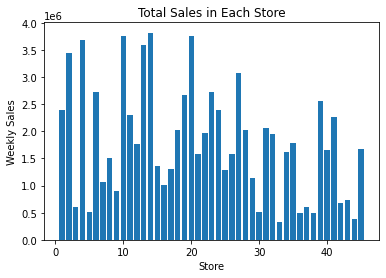

In [48]:
#create a bar graph
fig, ax = plt.subplots()
#plot histogram
store = df['Store']
sales = df['Weekly_Sales']
bars = ax.bar(store,sales)
#set title and label
ax.set_title('Total Sales in Each Store')
ax.set_xlabel('Store')
ax.set_ylabel('Weekly Sales')


#for bar in bars:
#    yval = bar.get_height()
#    plt.text(bar.get_x(), yval + .005, yval)

## Q2. Find out which holiday that had the highest sales.

In [129]:
#take the month from the 'Date' attribute, and create it as a new column
df['month'] = df["Date"].dt.month

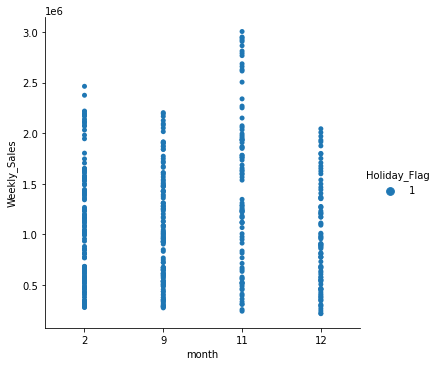

In [130]:
#select the month that have holidays
holiday = df.loc[df['Holiday_Flag'] == 1]
#plot the graph
sns.catplot(x="month", y="Weekly_Sales", hue="Holiday_Flag", jitter=False, data=holiday)

In [155]:
#select only month of November as it has the heighest total sales
month = holiday.loc[df['month'] == 11]
sales = month['Weekly_Sales']
max_value = sales.max()
print("The highest number of sales during holiday is", max_value)

The highest number of sales during holiday is 3004702.33


## Q3. Provide monthly view of the sales.

In [162]:
df['year'] = df["Date"].dt.year

[Text(0.5, 1.0, 'Montly view of the sales')]

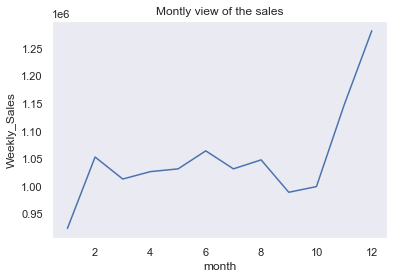

In [186]:
#Montly view of the sales
sns.lineplot(x= "month", y="Weekly_Sales", ci = None, data=df).set(title='Montly view of the sales')

[Text(0.5, 1.0, 'Montly total sales in each year')]

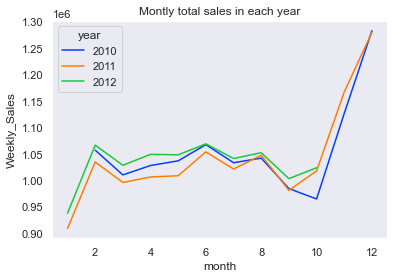

In [187]:
#Montly total sales in each year
sns.lineplot( x= "month", y="Weekly_Sales", hue="year", palette='bright', ci = None, data=df).set(title = "Montly total sales in each year")

## Q4. Total sales in each year.

In [202]:
Sales_each_year = df.groupby('year')['Weekly_Sales'].sum()
print(Sales_each_year)

year
2010    2.288886e+09
2011    2.448200e+09
2012    2.000133e+09
Name: Weekly_Sales, dtype: float64
